In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
from sklearn.model_selection import train_test_split

import seaborn as sns
import datetime as dt

import warnings


In [35]:
df = pd.read_csv(r"C:\Users\Sahil Patel\Desktop\AV\AV Assignments\dataset\nyc_taxi_trip_duration.csv")

In [36]:
df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id1080784          2  2016-02-29 16:40:21  2016-02-29 16:47:01   
1  id0889885          1  2016-03-11 23:35:37  2016-03-11 23:53:57   
2  id0857912          2  2016-02-21 17:59:33  2016-02-21 18:26:48   
3  id3744273          2  2016-01-05 09:44:31  2016-01-05 10:03:32   
4  id0232939          1  2016-02-17 06:42:23  2016-02-17 06:56:31   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.953918        40.778873         -73.963875   
1                2        -73.988312        40.731743         -73.994751   
2                2        -73.997314        40.721458         -73.948029   
3                6        -73.961670        40.759720         -73.956779   
4                1        -74.017120        40.708469         -73.988182   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.771164                  N            400  
1         40.694931                  N           1100  
2         40.774918                  N           1635  
3         40.780628                  N           1141  
4         40.740631                  N            848

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [38]:
df.shape

(729322, 11)

In [39]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [40]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [41]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

In [42]:
mapping = {"Y":1,"N":0}
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map(mapping)

In [43]:
df['check_trip_duration'] = (df['dropoff_datetime']-df['pickup_datetime']).map(lambda x: x.total_seconds())

In [44]:
df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id1080784          2 2016-02-29 16:40:21 2016-02-29 16:47:01   
1  id0889885          1 2016-03-11 23:35:37 2016-03-11 23:53:57   
2  id0857912          2 2016-02-21 17:59:33 2016-02-21 18:26:48   
3  id3744273          2 2016-01-05 09:44:31 2016-01-05 10:03:32   
4  id0232939          1 2016-02-17 06:42:23 2016-02-17 06:56:31   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.953918        40.778873         -73.963875   
1                2        -73.988312        40.731743         -73.994751   
2                2        -73.997314        40.721458         -73.948029   
3                6        -73.961670        40.759720         -73.956779   
4                1        -74.017120        40.708469         -73.988182   

   dropoff_latitude  store_and_fwd_flag  trip_duration  check_trip_duration  
0         40.771164                   0            400                400.0  
1         40.694931                   0           1100               1100.0  
2         40.774918                   0           1635               1635.0  
3         40.780628                   0           1141               1141.0  
4         40.740631                   0            848                848.0

In [45]:
df['trip_duration'].describe()/3600

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

Max Hours are 538 in the trip duration which means there are outliers here- we will hence do log transform to treat outliers

In [46]:
df['log_trip_duration'] = np.log(df['trip_duration'].values+1)
sns.histplot(df['log_trip_duration'], kde = True, bins=200)
plt.show()

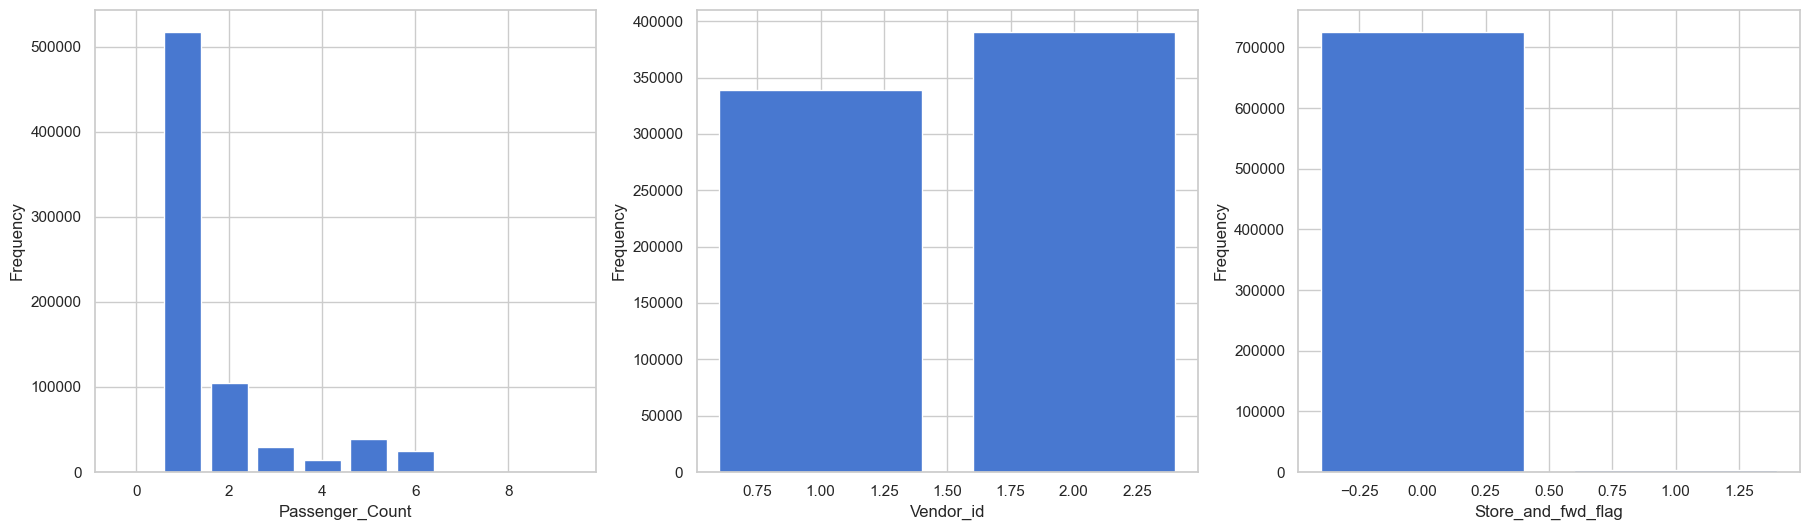

In [47]:
import matplotlib.pyplot as plt

passenger_count = df['passenger_count'].value_counts()
vendor_id = df['vendor_id'].value_counts()
store_and_fwd_flag = df['store_and_fwd_flag'].value_counts()

plt.figure(figsize=(22, 6))

plt.subplot(131)
plt.bar(passenger_count.index, passenger_count.values)
plt.xlabel('Passenger_Count')
plt.ylabel('Frequency')

plt.subplot(132)
plt.bar(vendor_id.index, vendor_id.values)
plt.xlabel('Vendor_id')
plt.ylabel('Frequency')

plt.subplot(133)
plt.bar(store_and_fwd_flag.index, store_and_fwd_flag.values)
plt.xlabel('Store_and_fwd_flag')
plt.ylabel('Frequency')

# plt.tight_layout()
plt.show()


In [48]:
df['day_of_week']= df['pickup_datetime'].dt.weekday
df['hour_of_day'] = df['pickup_datetime'].dt.hour

In [49]:

# day_of_week= df['day_of_week'].value_counts()
# hour_of_day = df['hour_of_day'].value_counts()

# plt.figure(figsize=(22,6))

# plt.subplot(121)
# sns.countplot(df['day_of_week'])
# plt.xlabel('Day_Week')
# plt.ylabel('Total Pickups')

# plt.subplot(122)
# sns.countplot(df['hour_of_day'])
# plt.xlabel('Hour_day')
# plt.ylabel('Total Pickups')

<Axes: xlabel='day_of_week', ylabel='trip_duration'>

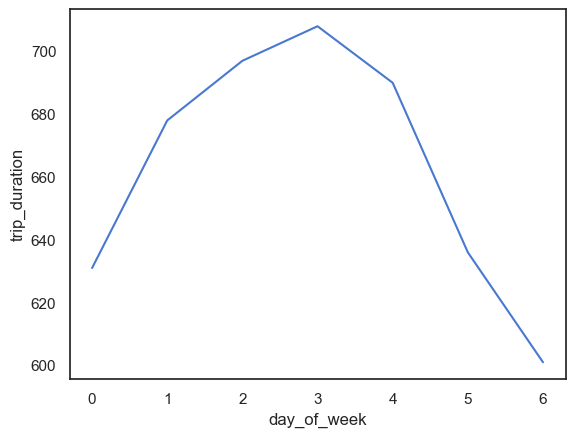

In [50]:
week_day_avg_duration = pd.DataFrame(df.groupby(df['day_of_week'])['trip_duration'].median())
week_day_avg_duration.reset_index(inplace = True)
week_day_avg_duration['unit']=1

sns.set(style = 'white', palette= 'muted', color_codes=True)
sns.lineplot(data=week_day_avg_duration,x = 'day_of_week',units = 'unit', y='trip_duration')

<Axes: xlabel='hour_of_day', ylabel='trip_duration'>

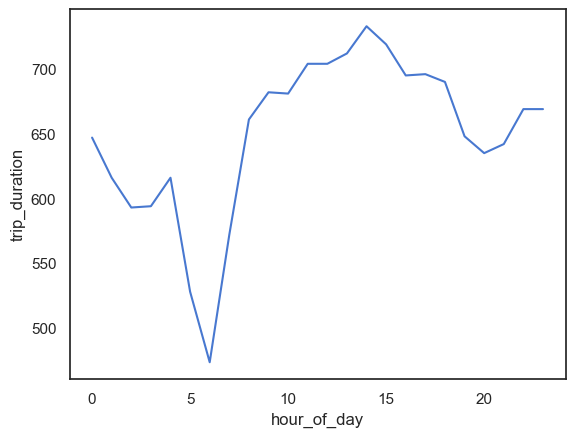

In [51]:
hour_day_avg_duration = pd.DataFrame(df.groupby(df['hour_of_day'])['trip_duration'].median())
hour_day_avg_duration.reset_index(inplace = True)
hour_day_avg_duration['unit']=1

sns.set(style = 'white', palette= 'muted', color_codes=True)
sns.lineplot(data=hour_day_avg_duration,x = 'hour_of_day',units = 'unit', y='trip_duration')

<Axes: xlabel='day_of_week', ylabel='trip_duration'>

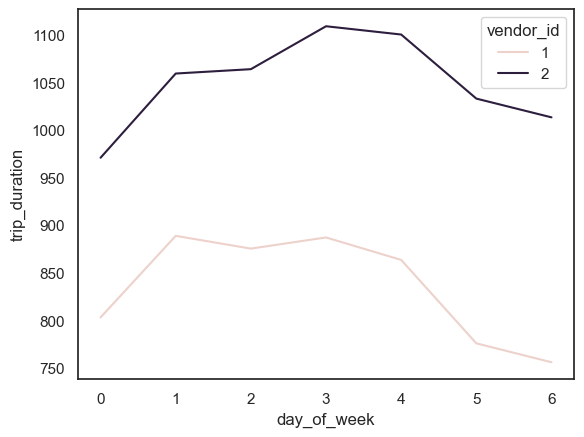

In [52]:
week_day_avg_duration = pd.DataFrame(df.groupby(['vendor_id','day_of_week'])['trip_duration'].mean())
week_day_avg_duration.reset_index(inplace = True)
week_day_avg_duration['unit']=1

sns.set(style = 'white', palette= 'muted', color_codes=True)
sns.lineplot(data=week_day_avg_duration,x = 'day_of_week',units = 'unit', y='trip_duration',hue =  'vendor_id')

<Axes: xlabel='day_of_week', ylabel='trip_duration'>

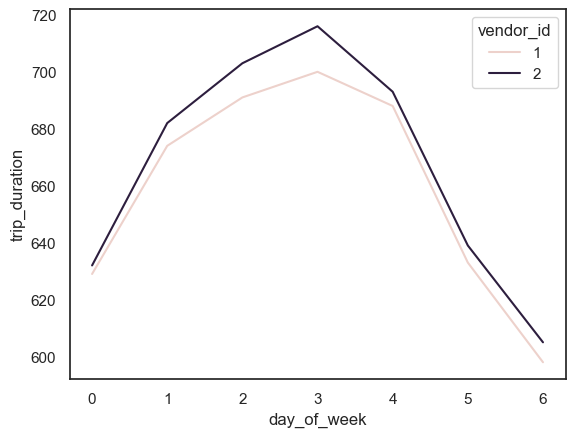

In [53]:
week_day_avg_duration = pd.DataFrame(df.groupby(['vendor_id','day_of_week'])['trip_duration'].median())
week_day_avg_duration.reset_index(inplace = True)
week_day_avg_duration['unit']=1

sns.set(style = 'white', palette= 'muted', color_codes=True)
sns.lineplot(data=week_day_avg_duration,x = 'day_of_week',units = 'unit', y='trip_duration',hue =  'vendor_id')

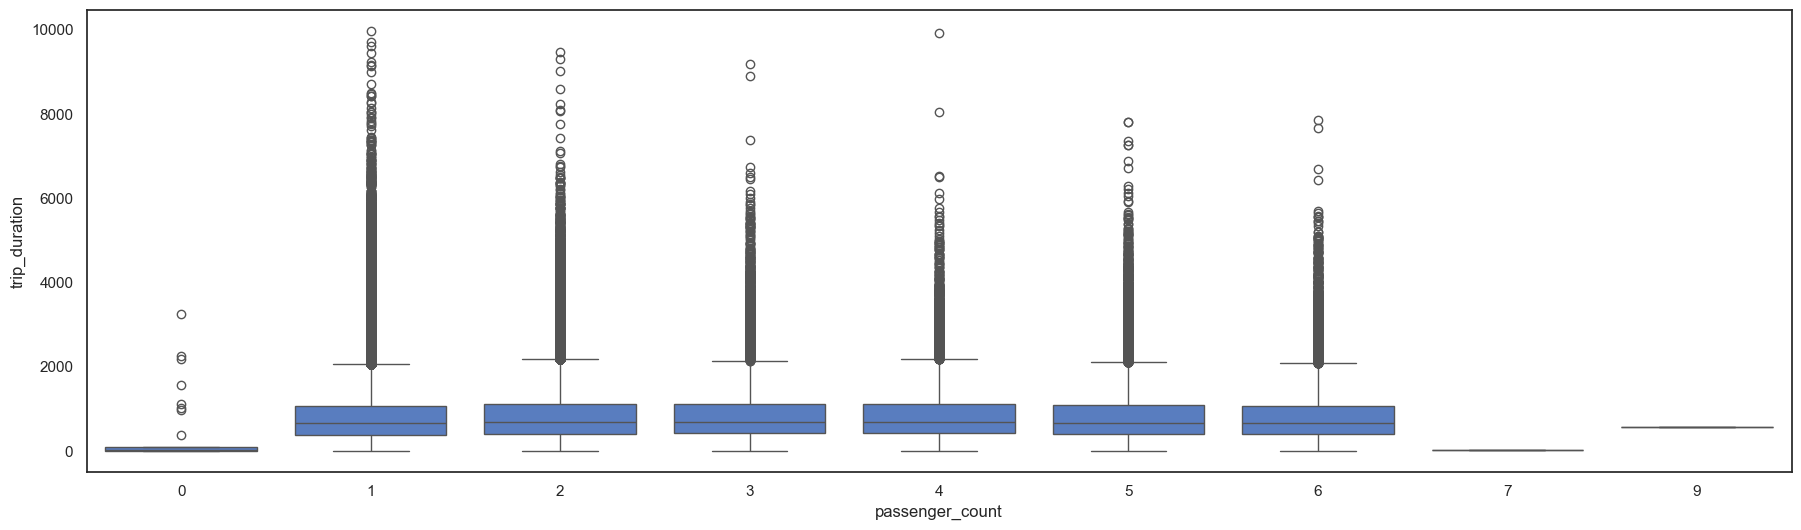

In [54]:
plt.figure(figsize=(22,6))
df_subset = df[df['trip_duration']<10000]
sns.boxplot(x='passenger_count',y= 'trip_duration',data=df_subset)
plt.show()

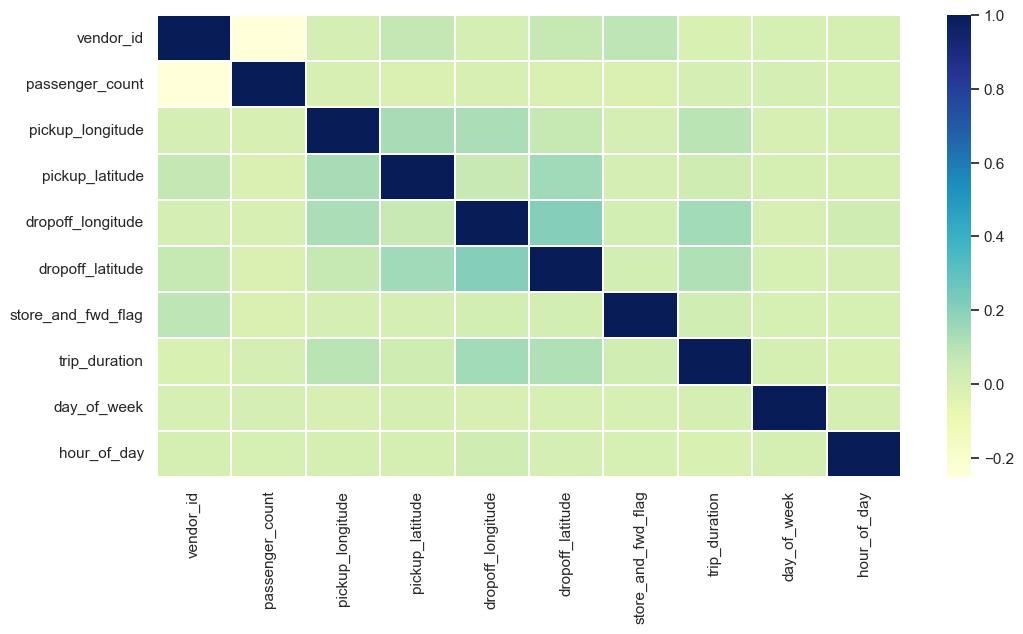

In [55]:
plt.figure(figsize=(12,6))
df2=df.drop(columns=['id','pickup_datetime','dropoff_datetime', 'log_trip_duration','check_trip_duration'], axis=1)
corr= df2.apply(lambda x: pd.factorize(x)[0]).corr()
ax= sns.heatmap(corr,linewidths=0.2,cmap='YlGnBu',xticklabels=corr.columns,yticklabels=corr.columns)


In [56]:
from sklearn.preprocessing import OneHotEncoder
one_hot_hour_enc = OneHotEncoder(sparse_output=False)
one_hot_hour = one_hot_hour_enc.fit_transform(df[['hour_of_day']])
one_hot_hour_df = pd.DataFrame(one_hot_hour, columns=one_hot_hour_enc.categories_[0])
one_hot_hour_df.columns = ["hour" + str(col) for col in one_hot_hour_df.columns]


one_hot_day_enc = OneHotEncoder(sparse_output=False)
one_hot_day = one_hot_day_enc.fit_transform(df[['day_of_week']])
one_hot_day_df = pd.DataFrame(one_hot_day, columns=one_hot_day_enc.categories_[0])
one_hot_day_df.columns = ["day" + str(col) for col in one_hot_day_df.columns]

df = pd.concat([df, one_hot_hour_df, one_hot_day_df], axis=1).drop(columns=["hour_of_day", 'day_of_week'], axis=1)
df.columns = df.columns.astype(str)

In [57]:
from geopy.distance import geodesic

def calculate_distance(row):
    point1 = (row['pickup_latitude'], row['pickup_longitude'])
    point2 = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(point1, point2).km

df['distance_km'] = df.apply(calculate_distance, axis=1)
#df = df.drop(columns=['dropoff_longitude', 'dropoff_latitude', 'pickup_longitude', 'pickup_latitude'])

In [61]:
y = df['log_trip_duration']
X = df.drop(['trip_duration','id','check_trip_duration','log_trip_duration','pickup_datetime','dropoff_datetime'], axis=1)
X

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0               2                1        -73.953918        40.778873   
1               1                2        -73.988312        40.731743   
2               2                2        -73.997314        40.721458   
3               2                6        -73.961670        40.759720   
4               1                1        -74.017120        40.708469   
...           ...              ...               ...              ...   
729317          2                2        -73.965919        40.789780   
729318          1                1        -73.996666        40.737434   
729319          1                1        -73.997849        40.761696   
729320          1                1        -74.006706        40.708244   
729321          2                4        -74.003342        40.743839   

        dropoff_longitude  dropoff_latitude  store_and_fwd_flag  hour0  hour1  \
0              -73.963875         40.771164                   0    0.0    0.0   
1              -73.994751         40.694931                   0    0.0    0.0   
2              -73.948029         40.774918                   0    0.0    0.0   
3              -73.956779         40.780628                   0    0.0    0.0   
4              -73.988182         40.740631                   0    0.0    0.0   
...                   ...               ...                 ...    ...    ...   
729317         -73.952637         40.789181                   0    0.0    0.0   
729318         -74.001320         40.731911                   0    1.0    0.0   
729319         -74.001488         40.741207                   0    0.0    0.0   
729320         -74.013550         40.713814                   0    0.0    0.0   
729321         -73.945847         40.712841                   0    0.0    0.0   

        hour2  ...  hour22  hour23  day0  day1  day2  day3  day4  day5  day6  \
0         0.0  ...     0.0     0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
1         0.0  ...     0.0     1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
2         0.0  ...     0.0     0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
3         0.0  ...     0.0     0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
4         0.0  ...     0.0     0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
...       ...  ...     ...     ...   ...   ...   ...   ...   ...   ...   ...   
729317    0.0  ...     0.0     0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
729318    0.0  ...     0.0     0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
729319    0.0  ...     0.0     0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
729320    0.0  ...     0.0     0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
729321    0.0  ...     0.0     0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   

        distance_km  
0          1.199770  
1          4.123945  
2          7.250436  
3          2.358287  
4          4.328155  
...             ...  
729317     1.123068  
729318     0.728563  
729319     2.295919  
729320     0.846722  
729321     5.953285  

[729322 rows x 39 columns]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
model2= DecisionTreeRegressor()
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [64]:
model2.fit(X_train, y_train)
pred= model2.predict(X_test)

In [65]:
predictions = model.predict(X_test)

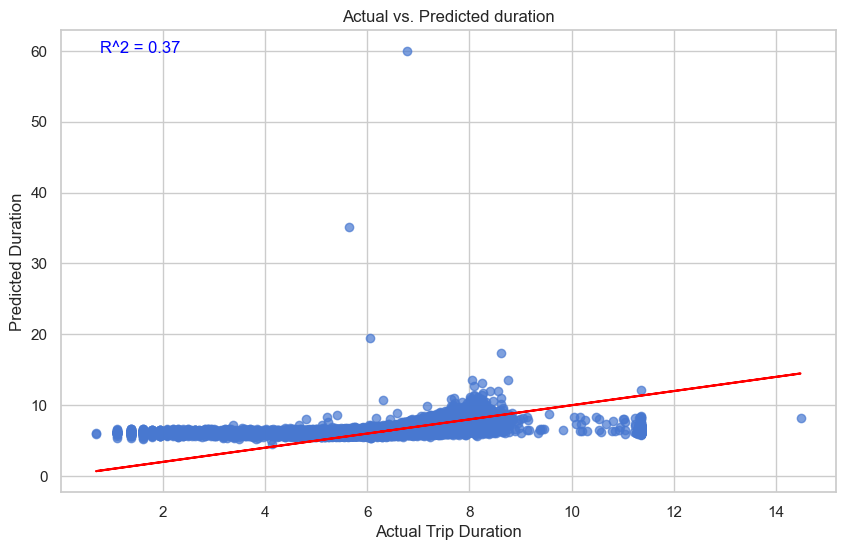

In [66]:
from sklearn.metrics import r2_score  # Ensure that r2_score is imported

# Calculate R-squared value
r2 = r2_score(y_test, predictions)

# Setting up the visual style
sns.set_style('whitegrid')

# Plotting the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions, alpha=0.7)
plt.plot(y_test, y_test, color='red')  # Ideal 45-degree line representing perfect predictions
plt.xlabel('Actual Trip Duration')
plt.ylabel('Predicted Duration')
plt.title('Actual vs. Predicted duration')

# Annotating the plot with R-Squared value
plt.annotate(f'R^2 = {r2:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='blue')

# Displaying the plot
plt.show()


In [67]:
# 1. Print the intercept and coefficients
print("Intercept:", model.intercept_)
print("\nCoefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

# 2. Print the R-squared value for the training and test sets

r2_test = r2_score( y_test,predictions)

print("R-squared value for test set:", r2_test)

Intercept: -5256820717.265832

Coefficients:
vendor_id: 0.021033067675221496
passenger_count: 0.007551169431885696
pickup_longitude: -1.2864551870255396
pickup_latitude: -2.840348716599478
dropoff_longitude: 1.3461997414992146
dropoff_latitude: -0.318281306715318
store_and_fwd_flag: -0.004390958475619204
hour0: 85015589.474663
hour1: 85015589.43455264
hour2: 85015589.38982245
hour3: 85015589.35857092
hour4: 85015589.28575307
hour5: 85015589.15008862
hour6: 85015589.21532406
hour7: 85015589.46774653
hour8: 85015589.63215584
hour9: 85015589.66700488
hour10: 85015589.66713943
hour11: 85015589.69921705
hour12: 85015589.69553131
hour13: 85015589.6864405
hour14: 85015589.7003124
hour15: 85015589.7099983
hour16: 85015589.68023473
hour17: 85015589.68321656
hour18: 85015589.66670199
hour19: 85015589.59146878
hour20: 85015589.53308372
hour21: 85015589.52541518
hour22: 85015589.54232517
hour23: 85015589.50633596
day0: 5171805266.830222
day1: 5171805266.919424
day2: 5171805266.944661
day3: 5171805

In [68]:
# 2. Print the R-squared value for the training and test sets

r2_test = r2_score( y_test,pred)

print("R-squared value for test set:", r2_test)

R-squared value for test set: 0.44782012232494606
